## Exact Analysis

In [9]:
import os

In [10]:
def get_energy(filename):
    file = open(filename,'r')
    data = file.readlines()
    file.close()
    filetype = filename.split('/')[-1] 
    if  filetype == 'imag_tprop.out':
        energy = float(data[-2].split('=')[1])
    elif filetype == 'scf_cycle.out':
        energy = float(data[-1].split(':')[-1])
    elif filetype == 'exact.log':
        energy = float(data[-2].split(':')[-1])
    else:
        energy = 0.00
    return energy

In [11]:
alpha = ['1e00', '1e-1', '1e-2']
beta = ['1e00', '1e-1', '1e-2']
atom_nos = [1,2,3,4,5,6]
ngrid = [32, 64, 128, 256, 512]
atoms_dict = {}
for z in atom_nos:
    atomdir = 'z_{z}'.format(z=z)
    job_dict = {}
    for a in alpha:
        for b in beta:
            jobdir = 'alpha_{a}_beta_{b}'.format(a=a,b=b)
            grid_dict = {}
            for n in ngrid:
                ndir = 'n_{n}'.format(n=n)
                path='../{atomdir}/{jobdir}/{ndir}'.format(atomdir=atomdir,jobdir=jobdir, ndir=ndir)
                if n>128:
                    try:
                        exact_filename=os.path.join(path,'imag_tprop.out')
                        e_exact = get_energy(exact_filename)
                    except:
                        e_exact = 0.0
                else:
                    exact_filename = os.path.join(path,'exact.log')
                    e_exact = get_energy(exact_filename)
                grid_dict[n] = e_exact
            jobdir = 'a_{a}_b_{b}'.format(a=a,b=b)
            job_dict[jobdir] = grid_dict
    atoms_dict[z] = job_dict

In [12]:
import pandas as pd
from IPython.display import display

In [13]:
pd.options.display.float_format = '{:,.10f}'.format
for i in range(1,7):
    df = pd.DataFrame(atoms_dict[i]).transpose()
    print('z = ',i)
    display(df)

z =  1


,32,64,128,256,512
a_1e00_b_1e00,-0.7278590395,-0.7307256097,-0.7307269634,-0.7307261743,0.0000000000
a_1e00_b_1e-1,-0.6500371938,-0.6522307190,-0.6519119759,-0.6517161919,0.0000000000
a_1e00_b_1e-2,-0.6465600051,-0.6485073702,-0.6482988233,-0.6481130947,0.0000000000
a_1e-1_b_1e00,-1.9129572948,-2.4562676746,-2.5287323230,-2.5295514698,0.0000000000
a_1e-1_b_1e-1,-1.4124550375,-1.7958531294,-1.8517421080,-1.8523795199,0.0000000000
a_1e-1_b_1e-2,-1.3230160235,-1.6200667742,-1.6618089717,0.0000000000,0.0000000000
a_1e-2_b_1e00,-2.4102224014,-4.3491336553,-6.1104363353,-6.6855145827,0.0000000000
a_1e-2_b_1e-1,-1.7998901164,-3.3834673067,-4.9488512757,0.0000000000,0.0000000000
a_1e-2_b_1e-2,-1.5904675027,-2.6308969164,-3.8072951091,0.0000000000,0.0000000000


z =  2


,32,64,128,256,512
a_1e00_b_1e00,-2.2244834141,-2.2382426671,-2.2382578241,-2.2382578240,-2.2382578237
a_1e00_b_1e-1,-1.8544922195,-1.8775293891,-1.8794590352,-1.8794790614,-1.8794790642
a_1e00_b_1e-2,-1.7561626571,-1.7791137600,-1.7893948577,0.0000000000,0.0000000000
a_1e-1_b_1e00,-5.1235743578,-6.6720438102,-6.9096994103,-6.9126024789,0.0000000000
a_1e-1_b_1e-1,-4.3499969719,-5.6664624399,-5.8803754590,-5.8830003462,0.0000000000
a_1e-1_b_1e-2,-3.8224621152,-4.6763907944,-4.9775840745,0.0000000000,0.0000000000
a_1e-2_b_1e00,-6.2304367526,-11.1873201031,-16.0519920358,0.0000000000,0.0000000000
a_1e-2_b_1e-1,-5.4061768433,-9.9617128822,-14.6046685751,0.0000000000,0.0000000000
a_1e-2_b_1e-2,-4.7881086263,-8.2277973183,-12.4904096551,-14.1133815446,0.0000000000


z =  3


,32,64,128,256,512
a_1e00_b_1e00,-3.8635390258,-3.8956626816,-3.8957031443,-3.8957031444,0.0000000000
a_1e00_b_1e-1,-3.3236384156,-3.3705887876,-3.3748463411,-3.3748902289,0.0000000000
a_1e00_b_1e-2,-3.0969605448,-3.1452005751,-3.1725181057,0.0000000000,0.0000000000
a_1e-1_b_1e00,-8.4696619323,-11.2061684567,-11.6761423803,-11.6823592212,0.0000000000
a_1e-1_b_1e-1,-7.6167965148,-10.0551921128,-10.4879841740,-10.4937258170,0.0000000000
a_1e-1_b_1e-2,-6.9477908495,-8.5826132958,-9.1719335407,0.0000000000,0.0000000000
a_1e-2_b_1e00,-10.1782219371,-18.4370233792,-26.9882840833,0.0000000000,0.0000000000
a_1e-2_b_1e-1,-9.2962152704,-17.1147953456,-25.4175854486,0.0000000000,0.0000000000
a_1e-2_b_1e-2,-8.5772971465,-14.9918097832,-22.8199805388,0.0000000000,0.0000000000


z =  4


,32,64,128,256,512
a_1e00_b_1e00,-5.5570176577,-5.6149601452,-5.6150435364,-5.6150435364,0.0000000000
a_1e00_b_1e-1,-4.9103047227,-4.9792694105,-4.9856751785,-4.9857408648,0.0000000000
a_1e00_b_1e-2,-4.5626928835,-4.6280934010,-4.6754290948,0.0000000000,0.0000000000
a_1e-1_b_1e00,-11.8633976032,-15.8941277261,-16.6525605451,0.0000000000,0.0000000000
a_1e-1_b_1e-1,-10.9760228253,-14.6599099865,-15.3653117604,-15.3754119093,0.0000000000
a_1e-1_b_1e-2,-10.2478553481,-12.8770619114,-13.7596997160,0.0000000000,0.0000000000
a_1e-2_b_1e00,-14.1691509095,-25.8639345521,-38.4529136627,0.0000000000,0.0000000000
a_1e-2_b_1e-1,-13.2625662635,-24.4929250691,-36.8115493461,0.0000000000,0.0000000000
a_1e-2_b_1e-2,-12.5013904353,-22.1755684270,-33.9115007912,0.0000000000,0.0000000000


z =  5


,32,64,128,256,512
a_1e00_b_1e00,-7.2800175158,-7.3709274153,-7.3710764317,-7.3710764319,0.0000000000
a_1e00_b_1e-1,-6.5627460562,-6.6536785820,-6.6619957592,-6.6620806916,0.0000000000
a_1e00_b_1e-2,-6.1154000378,-6.1850878725,-6.2536469137,0.0000000000,0.0000000000
a_1e-1_b_1e00,-15.2798821382,-20.6730657739,-21.7679444943,0.0000000000,0.0000000000
a_1e-1_b_1e-1,-14.3740889785,-19.3851183678,-20.4104197793,-20.4262177807,0.0000000000
a_1e-1_b_1e-2,-13.6142369395,-17.3933419422,-18.5833494491,0.0000000000,0.0000000000
a_1e-2_b_1e00,-18.1801505890,-33.3858989141,-50.2468401134,0.0000000000,0.0000000000
a_1e-2_b_1e-1,-17.2605324649,-31.9864729667,-48.5596216805,0.0000000000,0.0000000000
a_1e-2_b_1e-2,-16.4760872294,-29.5579780553,-45.4517555211,0.0000000000,0.0000000000


z =  6


,32,64,128,256,512
a_1e00_b_1e00,-9.0213976525,-9.1519635072,-9.1522062192,-9.1522062195,0.0000000000
a_1e00_b_1e-1,-8.2555455083,-8.3708641230,-8.3808911910,-8.3809932348,0.0000000000
a_1e00_b_1e-2,-7.7314032365,-7.7942596366,-7.8843145438,0.0000000000,0.0000000000
a_1e-1_b_1e00,-18.7090664060,-25.5115141642,-26.9844018541,0.0000000000,0.0000000000
a_1e-1_b_1e-1,-17.7921244792,-24.1864155275,-25.5733662351,-25.5962906339,0.0000000000
a_1e-1_b_1e-2,-17.0125000017,-22.0483369306,-23.5676915697,0.0000000000,0.0000000000
a_1e-2_b_1e00,-22.2021593090,-40.9653280132,-62.2643925457,0.0000000000,0.0000000000
a_1e-2_b_1e-1,-21.2746561528,-39.5478016635,-60.5451612802,0.0000000000,0.0000000000
a_1e-2_b_1e-2,-20.4753602301,-37.0494471282,-57.2865313752,0.0000000000,0.0000000000


In [14]:
pd.options.display.float_format = '{:,.10f}'.format
for i in range(1,7):
    df = pd.DataFrame(atoms_dict[i]).transpose()
    print(df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & 32 & 64 & 128 & 256 & 512 \\
\midrule
a_1e00_b_1e00 & -0.727859 & -0.730726 & -0.730727 & -0.730726 & 0.000000 \\
a_1e00_b_1e-1 & -0.650037 & -0.652231 & -0.651912 & -0.651716 & 0.000000 \\
a_1e00_b_1e-2 & -0.646560 & -0.648507 & -0.648299 & -0.648113 & 0.000000 \\
a_1e-1_b_1e00 & -1.912957 & -2.456268 & -2.528732 & -2.529551 & 0.000000 \\
a_1e-1_b_1e-1 & -1.412455 & -1.795853 & -1.851742 & -1.852380 & 0.000000 \\
a_1e-1_b_1e-2 & -1.323016 & -1.620067 & -1.661809 & 0.000000 & 0.000000 \\
a_1e-2_b_1e00 & -2.410222 & -4.349134 & -6.110436 & -6.685515 & 0.000000 \\
a_1e-2_b_1e-1 & -1.799890 & -3.383467 & -4.948851 & 0.000000 & 0.000000 \\
a_1e-2_b_1e-2 & -1.590468 & -2.630897 & -3.807295 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
 & 32 & 64 & 128 & 256 & 512 \\
\midrule
a_1e00_b_1e00 & -2.224483 & -2.238243 & -2.238258 & -2.238258 & -2.238258 \\
a_1e00_b_1e-1 & -1.854492 & -1.877529 & -1.879459 & -1.879479 & -1.

In [15]:
import matplotlib.pyplot as plt

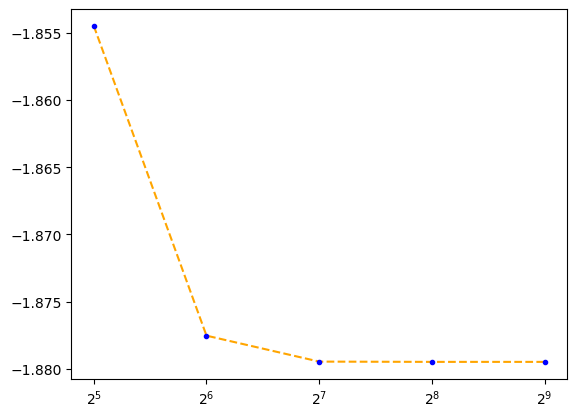

In [16]:
x,y = atoms_dict[2]['a_1e00_b_1e-1'].keys(), atoms_dict[2]['a_1e00_b_1e-1'].values()
plt.plot(x,y, '--',color='orange')
plt.plot(x,y, '.',color='blue')
plt.xscale('log',base=2)